# Otodom.pl Flat Prices in Poland
Author: Jakub Kubicki

This notebook presents data from website [kaggle.com](https://www.kaggle.com/datasets/amrahhasanov23/otodom-pl-flat-prices-in-poland?resource=download).

Some useful information about the columns:

**Title** - The title of the listing.

**Price** - The price of the listing in (PLN).

**Location** - The address values of the listing. In the website, the address information was added as a string with commas diving the voivodeship, city, county and street names of the address. (Like: ("ul. Ludwiki, Czyste, Wola, Warszawa, mazowieckie"). In other words, it wasn't possible to directly extract those values separately. So I just have created two new columns called Voivodeship and City in the data preprocessing part of the project in order to be able to assign geographic roles to the addresses of listed flats.

**Surface** - The surface of the listed flats in (m²).

**Number_of_Rooms** - The number of the rooms in the listed flats.

**Floor** - The floor which the listed flats are located.

**Finishing_Condition** - The living condition of the listed flat. Values: ("do zamieszkania", "do wykończenia", "do remontu", NaN). (In English translation: "for living", "to finish", NaN, "for renovation").

**Heating** - The heating system that the listed flats have. Values: (miejskie, gazowe, inne, kotłownia, elektryczne, piece kaflowe, NaN). (In English translation: urban, gas, other, boiler room, electric, tiled stoves, NaN).

**Parking_Space** - The parking space of the listed flats. Values: ("garaż/miejsce parkingowe", NaN)

**Balcony_Garden_Terrace** - The Balcony, Garden and Terrace. Values: (balkon, ogródek, taras)

**Link** - The link of the ad

**Voivodeship** - Created Voivodeship values.

**City** - Created City values.

## Firstly we delete all null data from our dataframe
Then thanks to function `summary()` we can see quantitative statistics important for dataset f.e. price mean value, median of surface, 1st and 3rd quantile of price as well as min and max value

In [4]:
data <- read.csv('Otodom_Flat_Listings.csv')
data <- na.omit(data)

summary(data)

    Title               Price             Location            Surface       
 Length:2664        Min.   :    44444   Length:2664        Min.   :   1.00  
 Class :character   1st Qu.:   395000   Class :character   1st Qu.:  43.00  
 Mode  :character   Median :   573000   Mode  :character   Median :  54.40  
                    Mean   :  1568793                      Mean   :  61.56  
                    3rd Qu.:   780000                      3rd Qu.:  69.00  
                    Max.   :162499380                      Max.   :3800.00  
 Number_of_Rooms       Floor           Finishing_Condition   Heating         
 Length:2664        Length:2664        Length:2664         Length:2664       
 Class :character   Class :character   Class :character    Class :character  
 Mode  :character   Mode  :character   Mode  :character    Mode  :character  
                                                                             
                                                                       

## Next we can see the structure of our data, available columns as well as example values.

In [20]:
head(data)

,Title,Price,Location,Surface,Number_of_Rooms,Floor,Finishing_Condition,Heating,Parking_Space,Balcony_Garden_Terrace,Link,Voivodeship,City
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2 pokoje 47m2 po remoncie + garderoba + balkon,415000,"ul. Marysińska, Stare Bałuty, Bałuty, Łódź, łódzkie",47.00,2,,do zamieszkania,miejskie,garaż/miejsce parkingowe,balkon,https://www.otodom.pl/pl/oferta/2-pokoje-47m2-po-remoncie-garderoba-balkon-ID4nlGC,Łódzkie,Łódź
2,Właściciel- Ludwiki DD - WIDOK NA ZIELEŃ - 2x gar,2499000,"ul. Ludwiki, Czyste, Wola, Warszawa, mazowieckie",105.00,4,2/8,do wykończenia,miejskie,garaż/miejsce parkingowe,balkon,https://www.otodom.pl/pl/oferta/wlasciciel-ludwiki-dd-widok-na-zielen-2x-gar-ID4mYBj,Mazowieckie,Warszawa
3,"Sprzedam mieszkanie 60m2, 2 balkony, garderoba",649000,"ul. Londyńska, Gorzów Wielkopolski, lubuskie",60.00,3,4/4,do zamieszkania,miejskie,,"balkon, taras",https://www.otodom.pl/pl/oferta/sprzedam-mieszkanie-60m2-2-balkony-garderoba-ID4nNUL,Lubuskie,Gorzów Wielkopolski
4,"Wyjątkowy, duży apartament z antresolą",2108000,"Mrzeżyno, Trzebiatów, gryficki, zachodniopomorskie",78.30,3,4/4,do wykończenia,,garaż/miejsce parkingowe,,https://www.otodom.pl/pl/oferta/wyjatkowy-duzy-apartament-z-antresola-ID4nSve,Zachodniopomorskie,gryficki
5,"2/3-pok. 49,2 m2 w samym sercu Koszalina - Kuncer",450180,"ul. Bartosza Głowackiego, Koszalin, zachodniopomorskie",49.20,2,2/3,do zamieszkania,miejskie,garaż/miejsce parkingowe,balkon,https://www.otodom.pl/pl/oferta/2-3-pok-49-2-m2-w-samym-sercu-koszalina-kuncer-ID4jdIf,Zachodniopomorskie,Koszalin
6,"Zgierz, 60,03m2, parter,",350000,"Zgierz, zgierski, łódzkie",60.03,3,parter,,,,,https://www.otodom.pl/pl/oferta/zgierz-60-03m2-parter-ID4nWly,Łódzkie,zgierski


## Using library `lattice` we can see the scatterplots with the regression line for that plot and a grid to make the graph more easy to read.

At the beginning I would like to show scatter plot with surface on x axis and Price on y axis for the whole data.

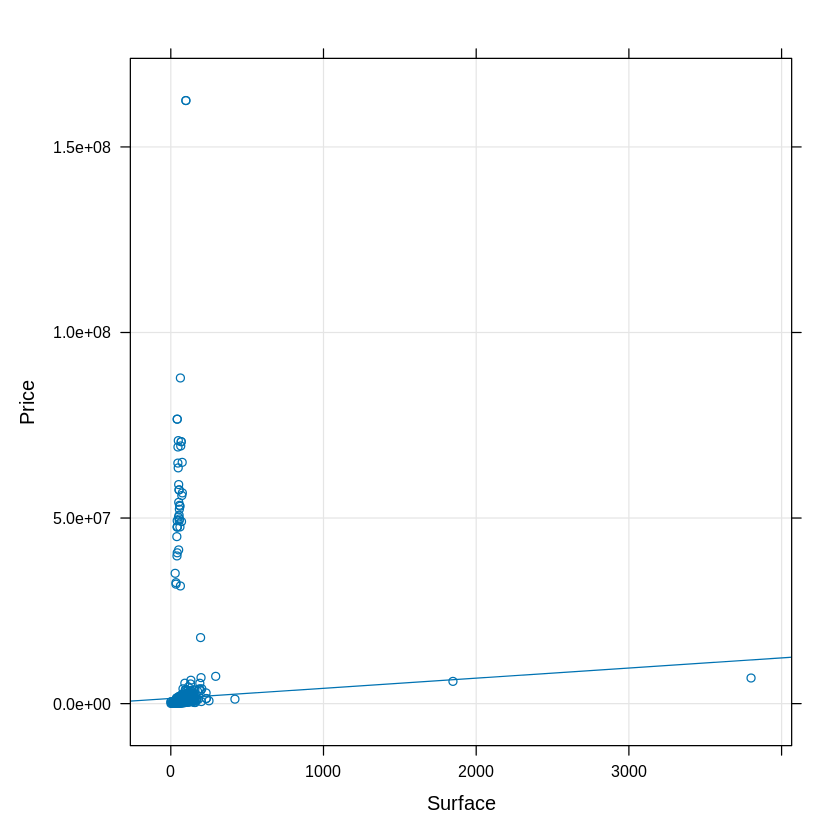

In [6]:
library(lattice)
xyplot(Price~Surface, data = data , type = c("p", "r", "g") )

Below we can see the histogram for price column of the data.

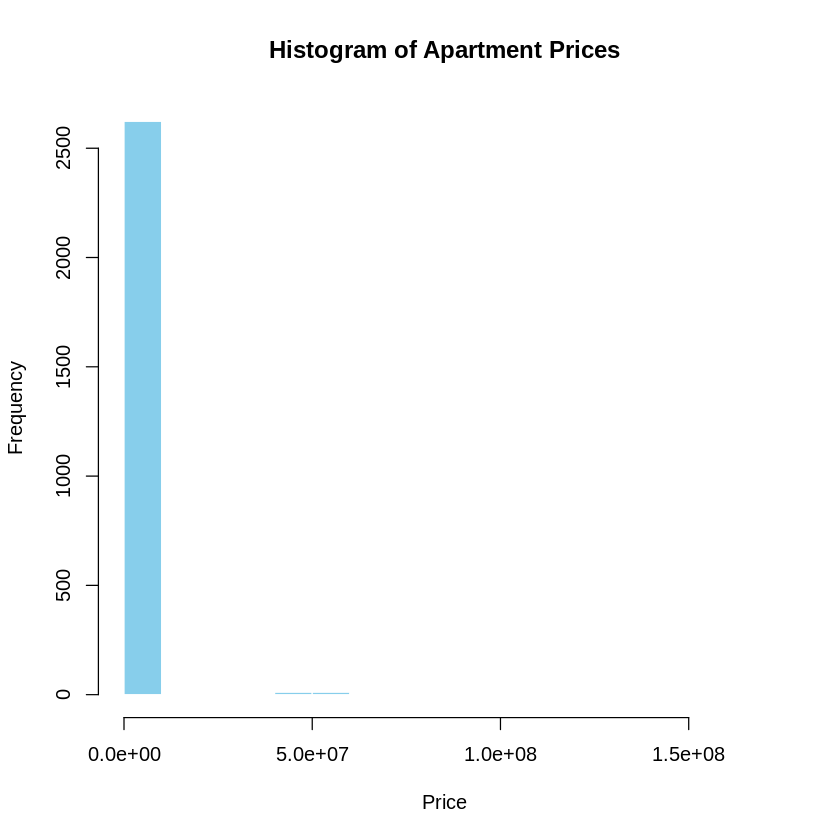

In [7]:
hist(data$Price,
     main = "Histogram of Apartment Prices",
     xlab = "Price",
     col = "skyblue",
     border = "white")

From scatter plot there is one outlier that has much bigger price then another. Therfore below this outlier is extracted from the data.

As we can see, there is the specific offer in Warszawa city for a flat that price is 162 499 380 zł

In [8]:
filtered <- data[data$Price > 150000000, ]
filtered

,Title,Price,Location,Surface,Number_of_Rooms,Floor,Finishing_Condition,Heating,Parking_Space,Balcony_Garden_Terrace,Link,Voivodeship,City
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
725,"4-pok na Bemowie. GOTOWE osiedle, Kup i Zamieszkaj",162499380,"ul. Kopalniana, Chrzanów, Bemowo, Warszawa, mazowieckie",98.79,4,2/4,do wykończenia,miejskie,,,https://www.otodom.pl/pl/oferta/4-pok-na-bemowie-gotowe-osiedle-kup-i-zamieszkaj-ID4nUI8,Mazowieckie,Warszawa
1670,"4-pok na Bemowie. GOTOWE osiedle, Kup i Zamieszkaj",162499380,"ul. Kopalniana, Chrzanów, Bemowo, Warszawa, mazowieckie",98.79,4,2/4,do wykończenia,miejskie,,,https://www.otodom.pl/pl/oferta/4-pok-na-bemowie-gotowe-osiedle-kup-i-zamieszkaj-ID4nUI8,Mazowieckie,Warszawa


To make the scatter plot more readible it would be good to cut out the maximum outliers from the Price axis. Therfore I reduced data to those for which price is less then 15 milions zł.

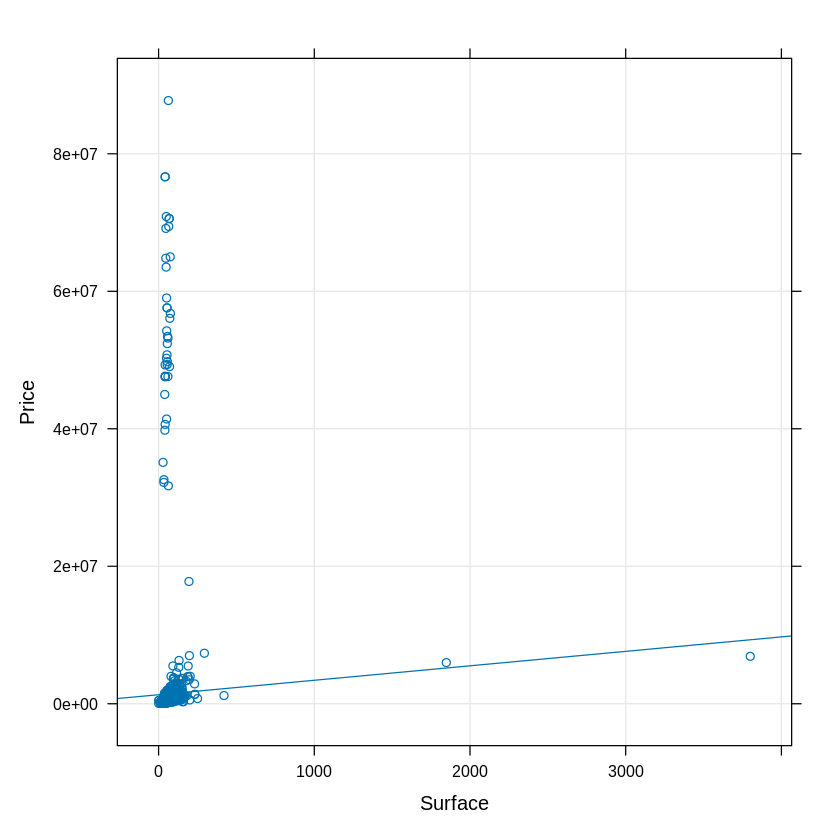

In [9]:
below_15m <- data[data$Price <= 150000000, ]
xyplot(Price~Surface, data = below_15m, type = c("p", "r", "g") )

We can see the histogram for those data below as well.

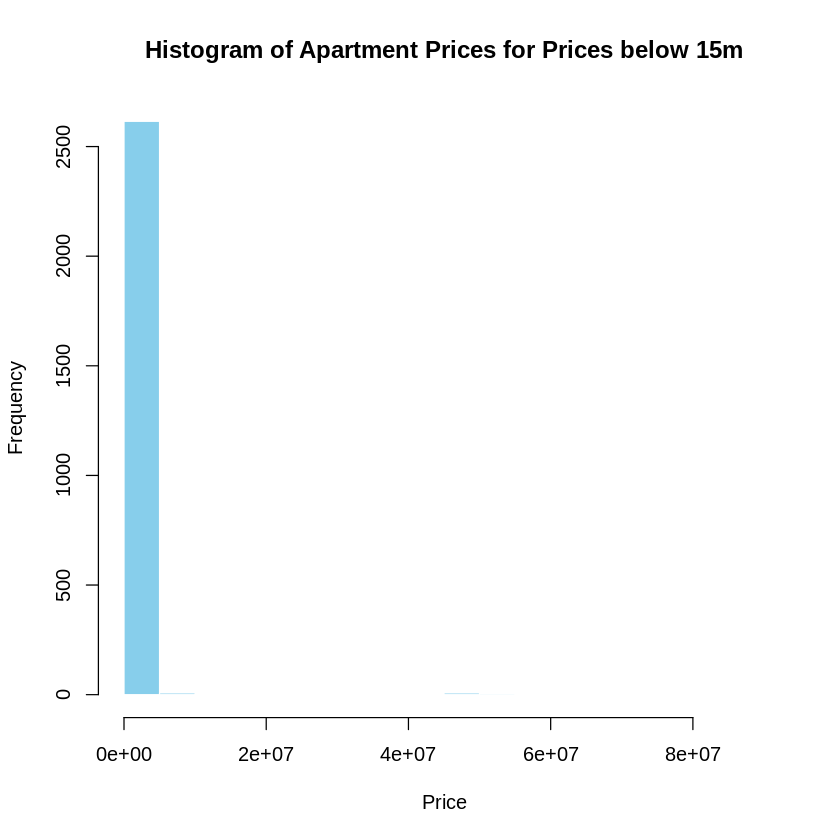

In [10]:
hist(below_15m$Price,
     main = "Histogram of Apartment Prices for Prices below 15m",
     xlab = "Price",
     col = "skyblue",
     border = "white")

Even if the scatter plot looks a little bit better the histogram still does not show much for prices.

Therfore price is reduced to 10m and I reduced also surface value to get rid of outliers.

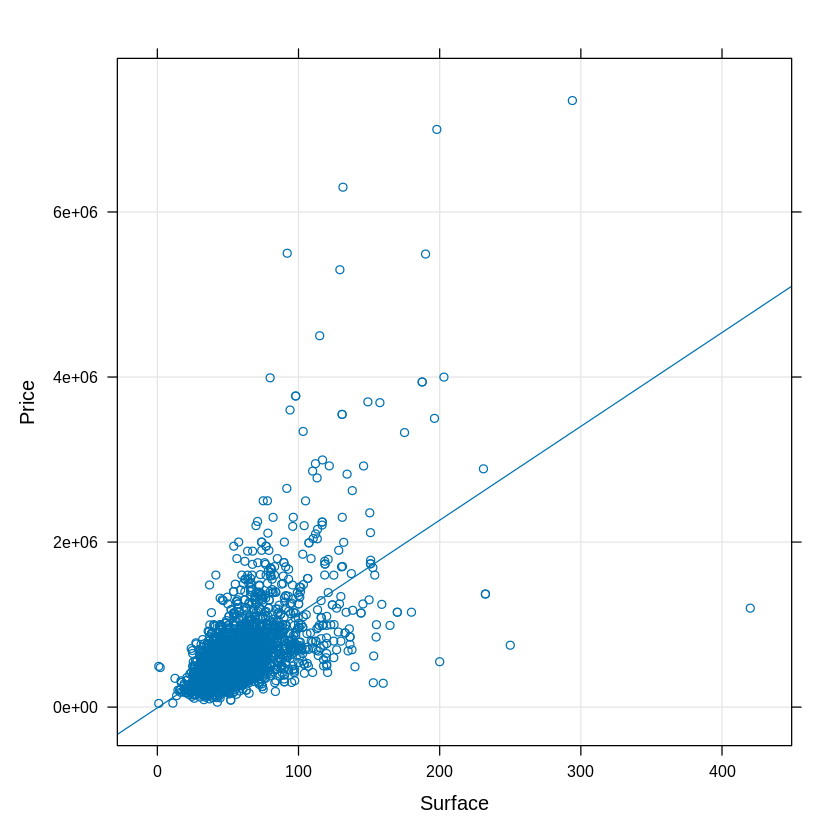

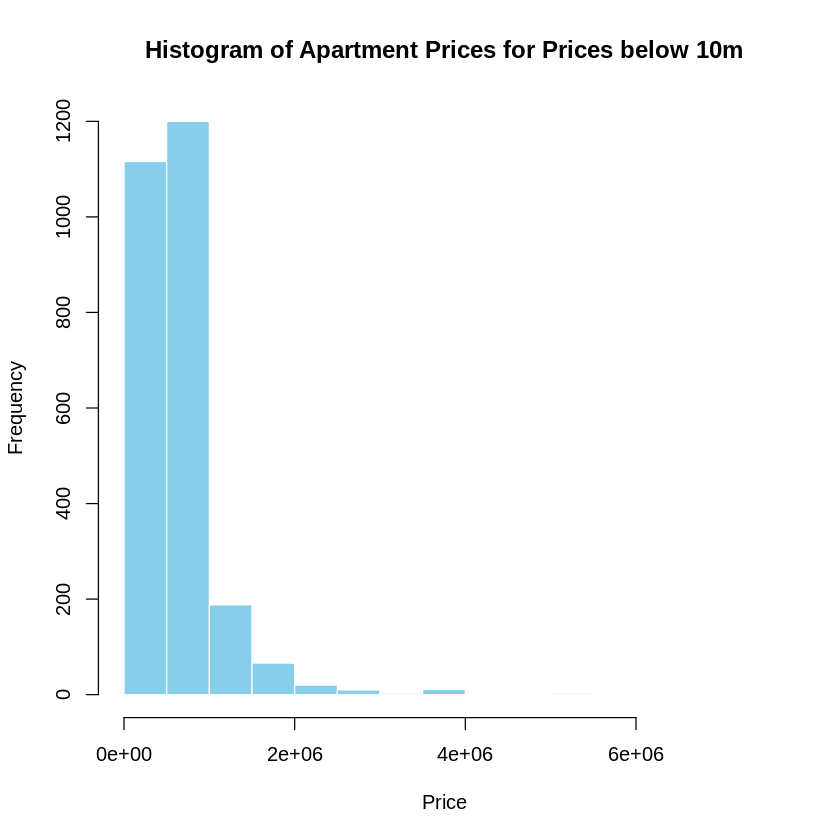

In [15]:
below_15m_and_1000m2 <- below_15m[below_15m$Surface <= 1000, ]
below_10m_and_1000m2 <- below_15m_and_1000m2[below_15m_and_1000m2$Price <= 10000000, ]

xyplot(Price~Surface, data = below_10m_and_1000m2, type = c("p", "r", "g") )

hist(below_10m_and_1000m2$Price,
     main = "Histogram of Apartment Prices for Prices below 10m",
     xlab = "Price",
     col = "skyblue",
     border = "white")

Finally we can see the offers for flats which price is less then 3m.

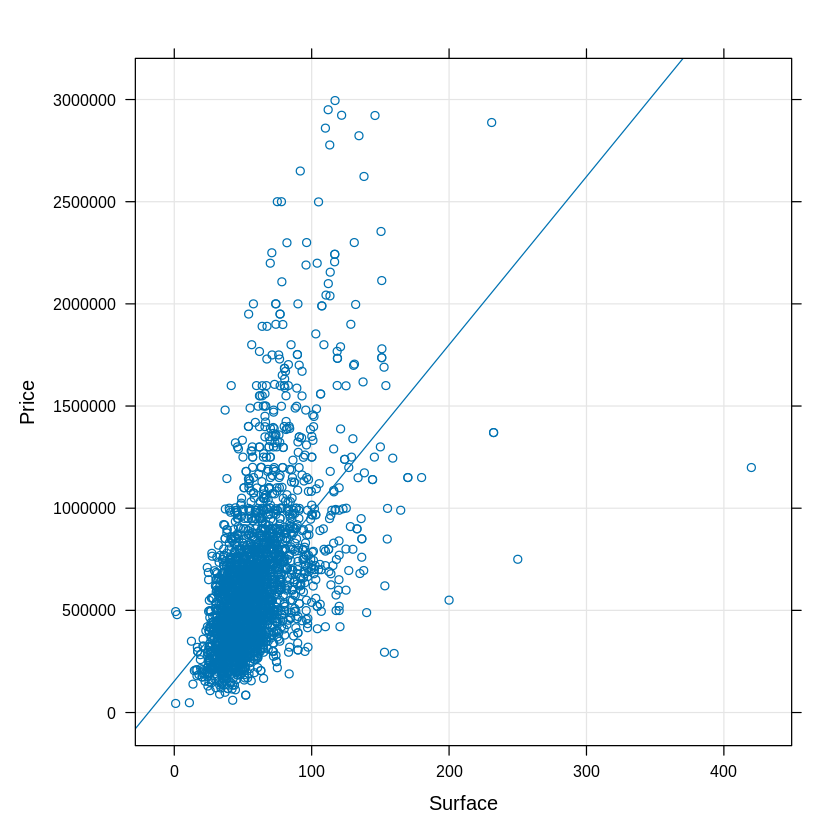

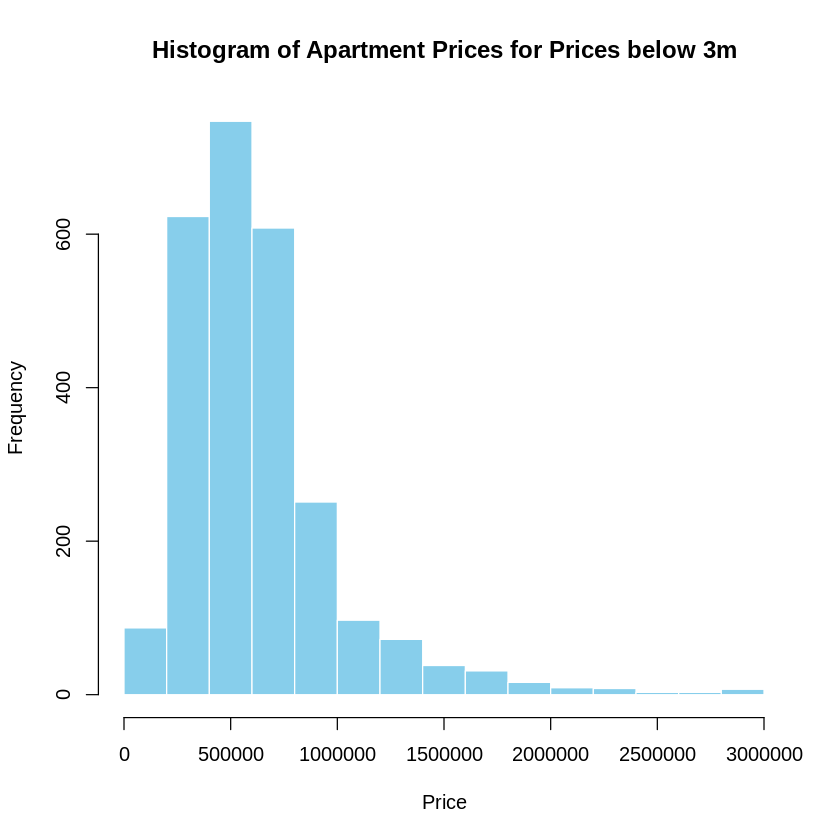

In [14]:
below_3m <- data[data$Price <= 3000000, ]

xyplot(Price~Surface, data = below_3m, type = c("p", "r", "g") )

hist(below_3m$Price,
     main = "Histogram of Apartment Prices for Prices below 3m",
     xlab = "Price",
     col = "skyblue",
     border = "white")

##Library `ggplot2` helps to show histograms of price by vivodship

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


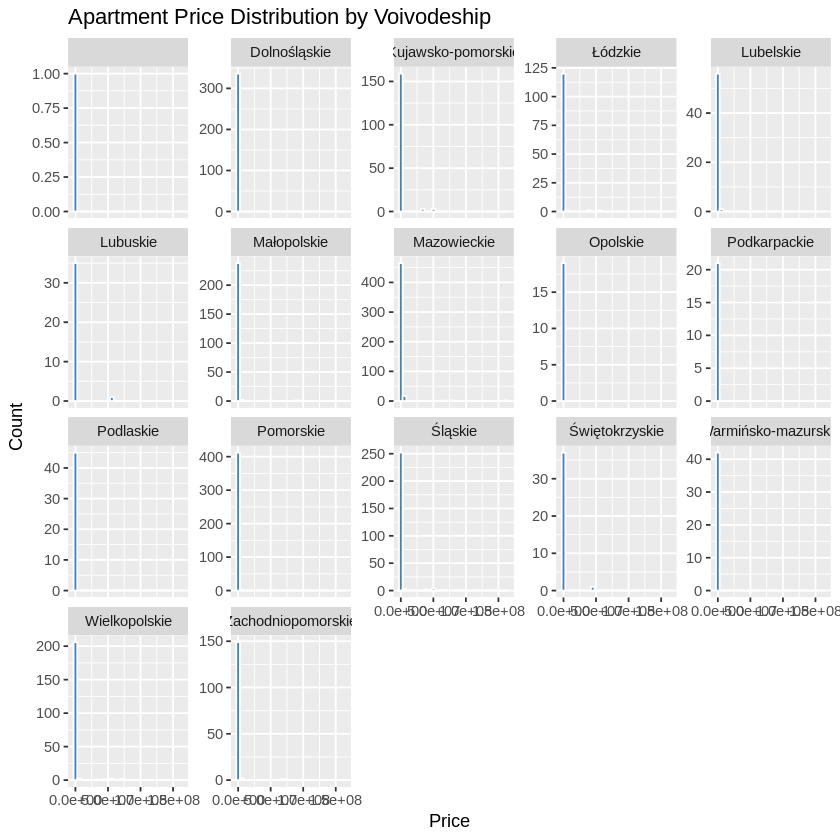

In [22]:
library(ggplot2)

ggplot(data, aes(x = Price)) +
  geom_histogram( fill = "steelblue", color = "white") +
  facet_wrap(~ Voivodeship, scales = "free_y") +
  labs(title = "Apartment Price Distribution by Voivodeship",
       x = "Price",
       y = "Count")


As for the general data I've limited data the have price lower then 3milions.

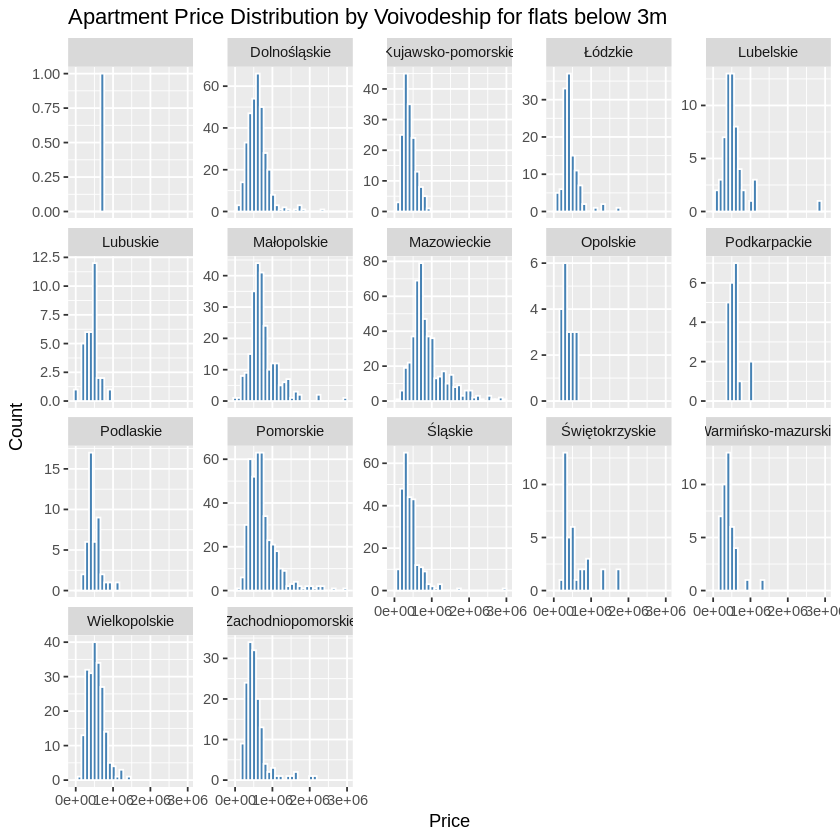

In [29]:
ggplot(below_3m, aes(x = Price)) +
  geom_histogram(fill = "steelblue", color = "white", bins = 30) +
  facet_wrap(~ Voivodeship, scales = "free_y") +
  labs(title = "Apartment Price Distribution by Voivodeship for flats below 3m",
       x = "Price",
       y = "Count")

To be more precise it is good not to scale the Price axis and show the comparrison of histograms by vivodeship.

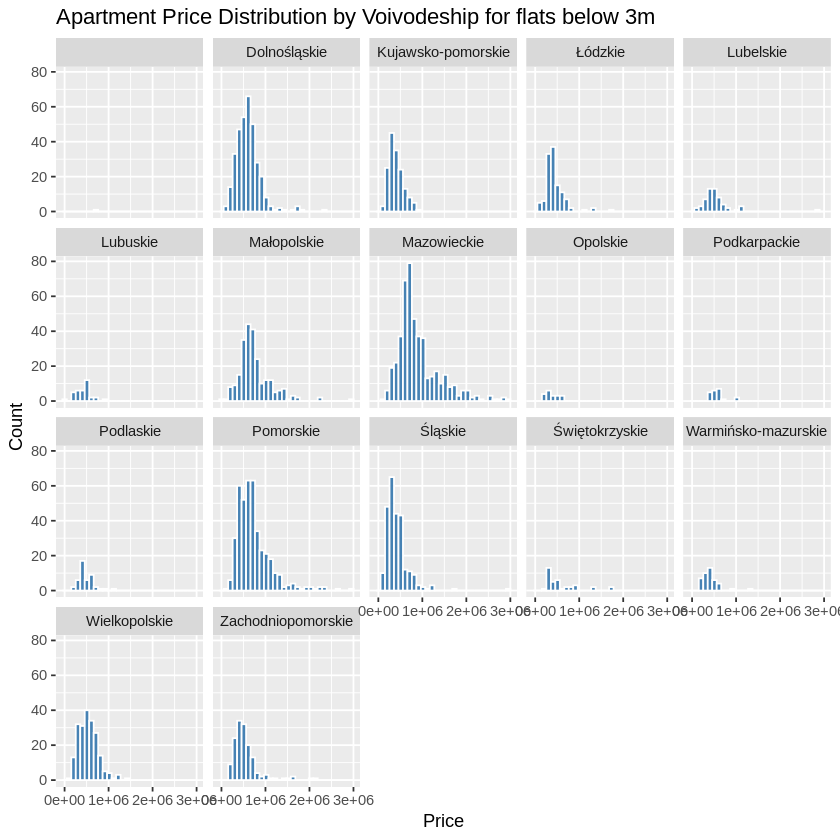

In [30]:
ggplot(below_3m, aes(x = Price)) +
  geom_histogram(fill = "steelblue", color = "white", bins = 30) +
  facet_wrap(~ Voivodeship) +
  labs(title = "Apartment Price Distribution by Voivodeship for flats below 3m",
       x = "Price",
       y = "Count")